## Problem Statement

The aim of this notebook is using Machine Learning to identify patients having thyroid related disease given their age, sex, and medical information – including test results for thyroid hormone levels in blood.

## Data Discription

- Age - age of the patient (float)
- Gender - sex patient identifies (str)
- Thyroxine - whether patient is on thyroxine (bool)
- Query Thyroxine - whether patient is on thyroxine (bool)
- Antithyroid - whether patient is on antithyroid meds (bool)
- Sick - whether patient is sick (bool)
- Pregnant - whether patient is pregnant (bool)
- I131_treatment - whether patient is undergoing I131 treatment (bool)
- Hypothyroid - whether patient have hypothyroid (bool)
- Hyperthyroid - whether patient have hyperthyroid (bool)
- Lithium - Ecxess Lithium intake by  patient (bool)
- Tumor - whether patient has tumor (bool)
- Hypopituitary - whether patient is having lack of hyperpituitary gland (bool)
- TSH - TSH level in blood from lab work (float)
- T3 - T3 level in blood from lab work (float)
- TT4 - TT4 level in blood from lab work (float)
- T4U - T4U level in blood from lab work (float)
- FTI - FTI level in blood from lab work (float)
- Referral_source - (str)
- Class - Positive/Negative(str)

In [1]:
## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [3]:
## Importing Dataset

In [4]:
data = pd.read_csv('thyroidData.csv')

In [5]:
data.head()

,age,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,referralSource,class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,NaN,f,4.10,2.0,102.0,NaN,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,NaN,f,0.98,NaN,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,NaN,f,0.16,1.9,175.0,NaN,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative


In [6]:
data.shape

(2690, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2689 non-null   float64
 1   gender          2690 non-null   object 
 2   Thyroxine       2690 non-null   object 
 3   queryThyroxine  2690 non-null   object 
 4   antithyroid     2690 non-null   object 
 5   sick            2690 non-null   object 
 6   pregnant        2690 non-null   object 
 7   I131treatment   2690 non-null   object 
 8   hypothyroid     2690 non-null   object 
 9   hyperthyroid    2690 non-null   object 
 10  lithium         2690 non-null   object 
 11  tumor           1494 non-null   object 
 12  hypopituitary   2690 non-null   object 
 13  TSH             2419 non-null   float64
 14  T3              2120 non-null   float64
 15  TT4             2518 non-null   float64
 16  T4U             2410 non-null   float64
 17  FTI             2412 non-null   f

In [8]:
# Checking the target feature

data['class'].value_counts()

negative                     2562
increased binding protein     120
decreased binding protein       8
Name: class, dtype: int64

- increased binding protein clearly a positive sign of Thyroid 
- decreased binding protein can be considered as negative class itself

In [9]:
# Adjusting the target feature

data['class'].replace(to_replace = ['decreased binding protein','increased binding protein' ], value =['negative', 'positive'], inplace = True)

<AxesSubplot:ylabel='class'>

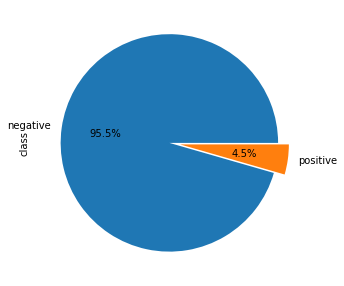

In [10]:
plt.figure(figsize = (7,5))
data['class'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%', explode = [0,0.1])

- Our dataset is biased one

In [11]:
data.columns

Index(['age', 'gender', 'Thyroxine', 'queryThyroxine', 'antithyroid', 'sick',
       'pregnant', 'I131treatment', 'hypothyroid', 'hyperthyroid', 'lithium',
       'tumor', 'hypopituitary', 'TSH', 'T3', 'TT4', 'T4U', 'FTI',
       'referralSource', 'class'],
      dtype='object')

In [12]:
# Checking duplicates in dataset

data.duplicated().sum()

29

In [13]:
# Removing Duplicated data from dataset
data.drop_duplicates(inplace = True)

In [14]:
data.shape

(2661, 20)

In [15]:
data.isnull().sum()

age                  1
gender               0
Thyroxine            0
queryThyroxine       0
antithyroid          0
sick                 0
pregnant             0
I131treatment        0
hypothyroid          0
hyperthyroid         0
lithium              0
tumor             1183
hypopituitary        0
TSH                242
T3                 541
TT4                143
T4U                251
FTI                249
referralSource       0
class                0
dtype: int64

In [16]:
#Droping unnecessary feature
data.drop('referralSource', axis = 1, inplace = True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2661 entries, 0 to 2689
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2660 non-null   float64
 1   gender          2661 non-null   object 
 2   Thyroxine       2661 non-null   object 
 3   queryThyroxine  2661 non-null   object 
 4   antithyroid     2661 non-null   object 
 5   sick            2661 non-null   object 
 6   pregnant        2661 non-null   object 
 7   I131treatment   2661 non-null   object 
 8   hypothyroid     2661 non-null   object 
 9   hyperthyroid    2661 non-null   object 
 10  lithium         2661 non-null   object 
 11  tumor           1478 non-null   object 
 12  hypopituitary   2661 non-null   object 
 13  TSH             2419 non-null   float64
 14  T3              2120 non-null   float64
 15  TT4             2518 non-null   float64
 16  T4U             2410 non-null   float64
 17  FTI             2412 non-null   f

## Data Analysis

In [18]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2660.000000,2419.000000,2120.000000,2518.000000,2410.000000,2412.000000
mean,51.990602,4.514698,2.021274,109.065687,0.998238,110.707007
std,20.535669,19.649899,0.825092,35.416772,0.194800,32.531258
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.000000,0.435000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.000000,2.600000,2.400000,125.000000,1.080000,124.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000


- we can observe data consists of extreme outliers

<AxesSubplot:xlabel='age', ylabel='Count'>

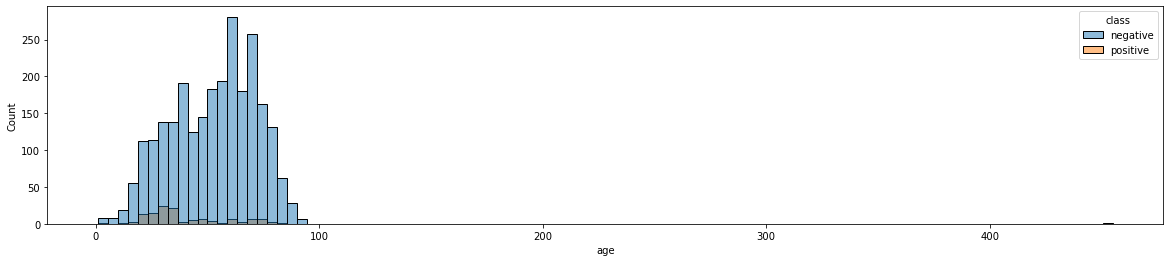

In [19]:
plt.figure(figsize = (20,4))
sns.histplot(x = 'age', hue = 'class', data = data)

- Thyroid emergers at an early age of 19 and can show symoptoms till the age of 76
- Although thyroid is not very commom in elder age group, people in the late 20s and late 70s shows positive sign of thyroid.
- People in their 30s & 70s have significant chanches of getting thyroid.

<AxesSubplot:xlabel='gender', ylabel='count'>

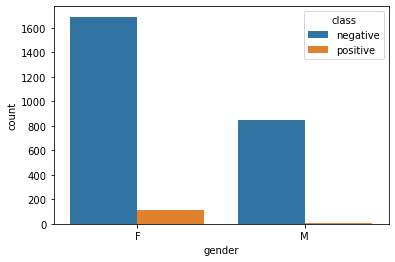

In [20]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'gender', hue = 'class', data = data)

- Females are prone to have thyriod more as compared to Males.

In [21]:
data['class'] = data['class'].map({"positive":1,"negative":0})

In [22]:
data.select_dtypes(include = np.number).columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'class'], dtype='object')

<AxesSubplot:ylabel='gender'>

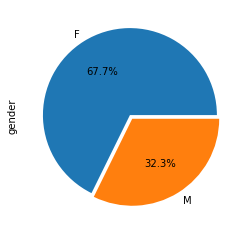

In [23]:
data['gender'].value_counts().plot(kind = 'pie', autopct ='%0.1f%%', explode = [0,0.05] )

- Our data is having majority of Females candidates

<AxesSubplot:xlabel='FTI', ylabel='Count'>

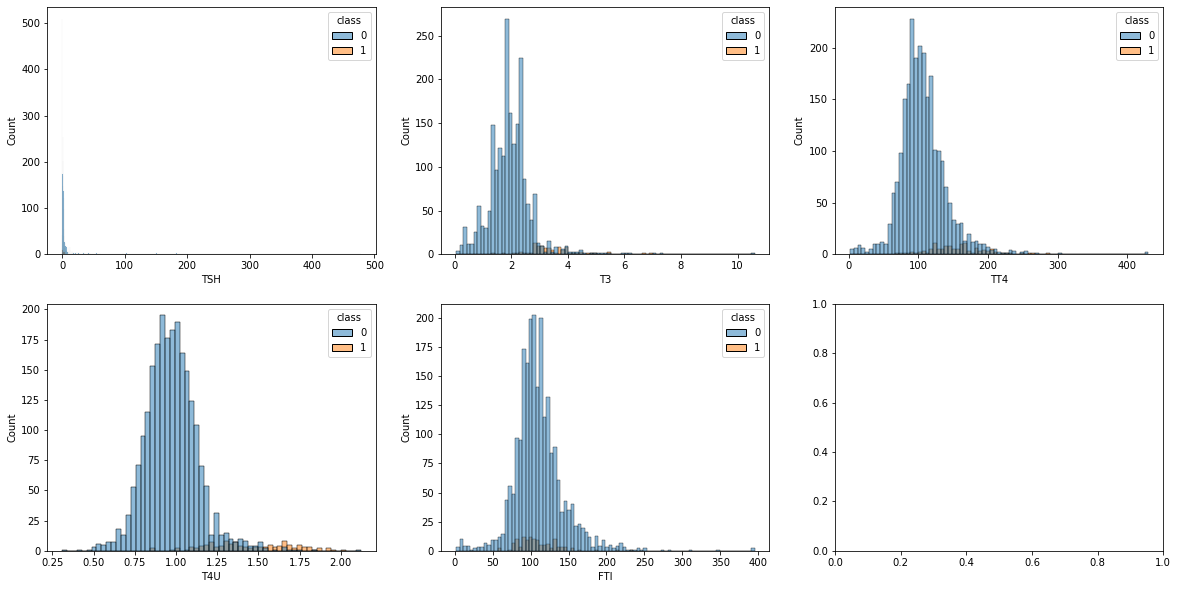

In [24]:
fig, ax = plt.subplots(2,3, figsize =(20,10))

sns.histplot(x= 'TSH', hue = 'class', data=data, ax = ax[0][0])
sns.histplot(x= 'T3', hue = 'class', data=data, ax = ax[0][1])
sns.histplot(x= 'TT4', hue = 'class', data=data, ax = ax[0][2])
sns.histplot(x= 'T4U', hue = 'class', data=data, ax = ax[1][0])
sns.histplot(x= 'FTI', hue = 'class', data=data, ax = ax[1][1])

- All these specific presence of substances in blood does not much contribute to Thyroid.
- However, presence of "T4U" above 1.3 units in blood leads to positive signs for Thyroid.

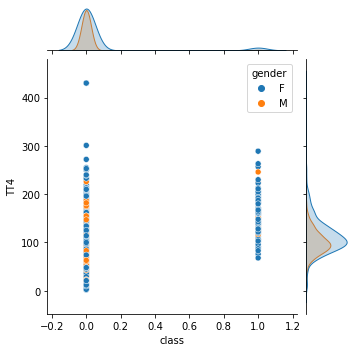

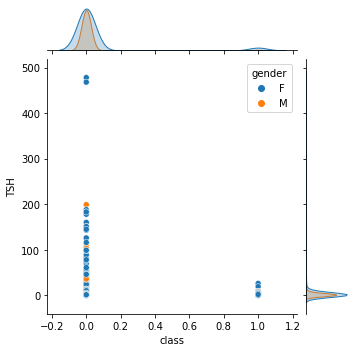

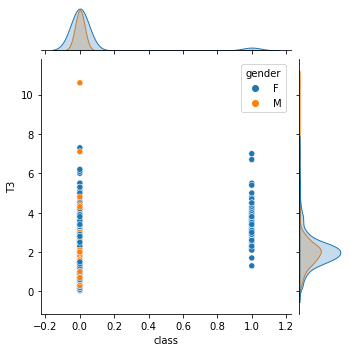

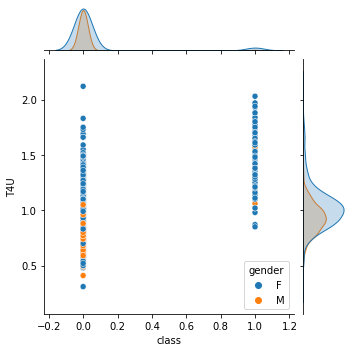

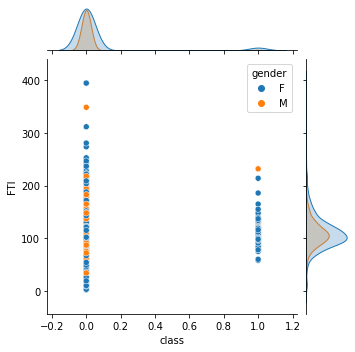

In [25]:
sns.jointplot(x='class', y='TT4', data=data, kind='scatter', height=5,  hue = 'gender')
sns.jointplot(x='class', y='TSH', data=data, kind='scatter', height=5,  hue = 'gender')
sns.jointplot(x='class', y='T3', data=data, kind='scatter', height=5,  hue = 'gender')
sns.jointplot(x='class', y='T4U', data=data, kind='scatter', height=5,  hue = 'gender')
sns.jointplot(x='class', y='FTI', data=data, kind='scatter', height=5,  hue = 'gender')

#### From the above observation on 'TSH', 'T3', 'TT4', 'T4U', 'FTI' in blood w.r.t Age we conclude that :

- Level of TT4 that results in Positive cases for tyroid is having in range of (70-270) and majorly in Females.
- Level of THS that results in Positive cases for tyroid is having in range of (0-25) and majorly in Females.
- Level of T3 in blood results in Positive cases for tyroid is having in range of (1.5-5.5).
- Level of T4U in blood results in Positive cases for tyroid is having in range of (0.8-2) and contributing to both genders.
- Level of FTI in blood results in Positive cases for tyroid is having in range of (60-230).

In [26]:
data['pregnant'] = data['pregnant'].map({"t":1,"f":0})

<AxesSubplot:xlabel='pregnant'>

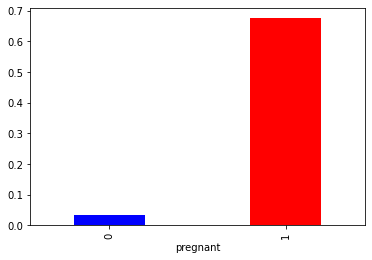

In [27]:
pregnant_class =data.pivot_table(values= 'class', columns ='pregnant')
pregnant_class.loc['class',:].plot(kind='bar', width=0.4,color=['b','r'])

- Almost 68% changes of having Thyroid during Pregnancy.

In [28]:
data['I131treatment'] = data['I131treatment'].map({"t":1,"f":0})

<AxesSubplot:xlabel='I131treatment'>

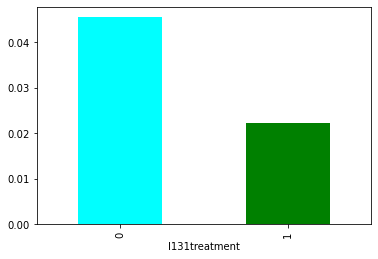

In [29]:
I131treatment_class =data.pivot_table(values= 'class', index ='I131treatment' )
I131treatment_class.loc[:,'class'].plot(kind= 'bar', color =['cyan','green'])

- Data shows that people which are not undergoing 'I131treatment' are prone to have Thyroid 2X times.

## Feature Engineering

In [30]:
# Handling missing values

In [31]:
data.isnull().sum()

age                  1
gender               0
Thyroxine            0
queryThyroxine       0
antithyroid          0
sick                 0
pregnant             0
I131treatment        0
hypothyroid          0
hyperthyroid         0
lithium              0
tumor             1183
hypopituitary        0
TSH                242
T3                 541
TT4                143
T4U                251
FTI                249
class                0
dtype: int64

In [32]:
data['TSH'] = data['TSH'].fillna(data['TSH'].mean())
data['T3'] = data['T3'].fillna(data['T3'].mean())
data['TT4'] = data['TT4'].fillna(data['TT4'].mean())
data['T4U'] = data['T4U'].fillna(data['T4U'].mean())
data['FTI'] = data['FTI'].fillna(data['FTI'].mean())

In [33]:
data['age'] = data['age'].fillna(data['age'].mode()[0])

In [34]:
data['tumor'] = data['tumor'].fillna(data['tumor'].mode()[0])

In [35]:
data.isnull().sum()

age               0
gender            0
Thyroxine         0
queryThyroxine    0
antithyroid       0
sick              0
pregnant          0
I131treatment     0
hypothyroid       0
hyperthyroid      0
lithium           0
tumor             0
hypopituitary     0
TSH               0
T3                0
TT4               0
T4U               0
FTI               0
class             0
dtype: int64

In [36]:
# Outliers Handeling

<AxesSubplot:xlabel='FTI'>

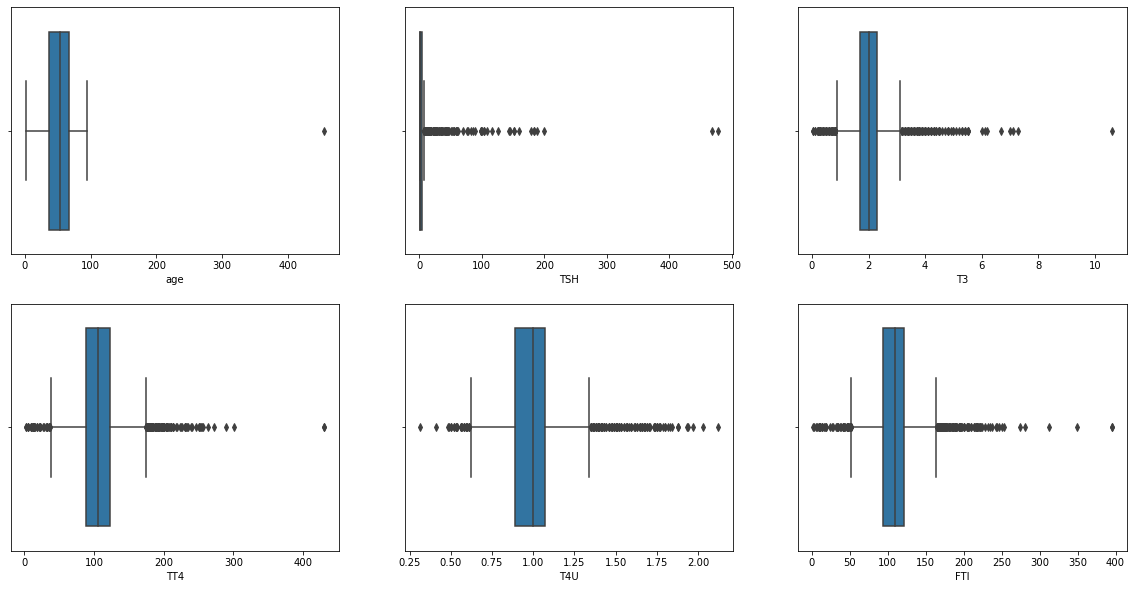

In [37]:
fig, ax = plt.subplots(2,3, figsize =(20,10))

sns.boxplot(data['age'], ax = ax[0][0])
sns.boxplot(data['TSH'], ax = ax[0][1])
sns.boxplot(data['T3'], ax = ax[0][2])
sns.boxplot(data['TT4'], ax = ax[1][0])
sns.boxplot(data['T4U'], ax = ax[1][1])
sns.boxplot(data['FTI'], ax = ax[1][2])

In [38]:
# Age
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.age >= Q1-1.5*IQR) & (data.age <= Q3+1.5*IQR)]

In [39]:
# TSH
Q1 = data.TSH.quantile(0.25)
Q3 = data.TSH.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.TSH >= Q1-1.5*IQR) & (data.TSH <= Q3+1.5*IQR)]

In [40]:
# T3
Q1 = data.T3.quantile(0.25)
Q3 = data.T3.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.T3 >= Q1-1.5*IQR) & (data.T3 <= Q3+1.5*IQR)]

In [41]:
# TT4
Q1 = data.TT4.quantile(0.25)
Q3 = data.TT4.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.TT4 >= Q1-1.5*IQR) & (data.TT4 <= Q3+1.5*IQR)]

In [42]:
# T4U
Q1 = data.T4U.quantile(0.25)
Q3 = data.T4U.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.T4U >= Q1-1.5*IQR) & (data.T4U <= Q3+1.5*IQR)]

In [43]:
# FTI
Q1 = data.FTI.quantile(0.25)
Q3 = data.FTI.quantile(0.75)

IQR = Q3 -Q1
data = data[(data.FTI >= Q1-1.5*IQR) & (data.FTI <= Q3+1.5*IQR)]

<AxesSubplot:xlabel='FTI'>

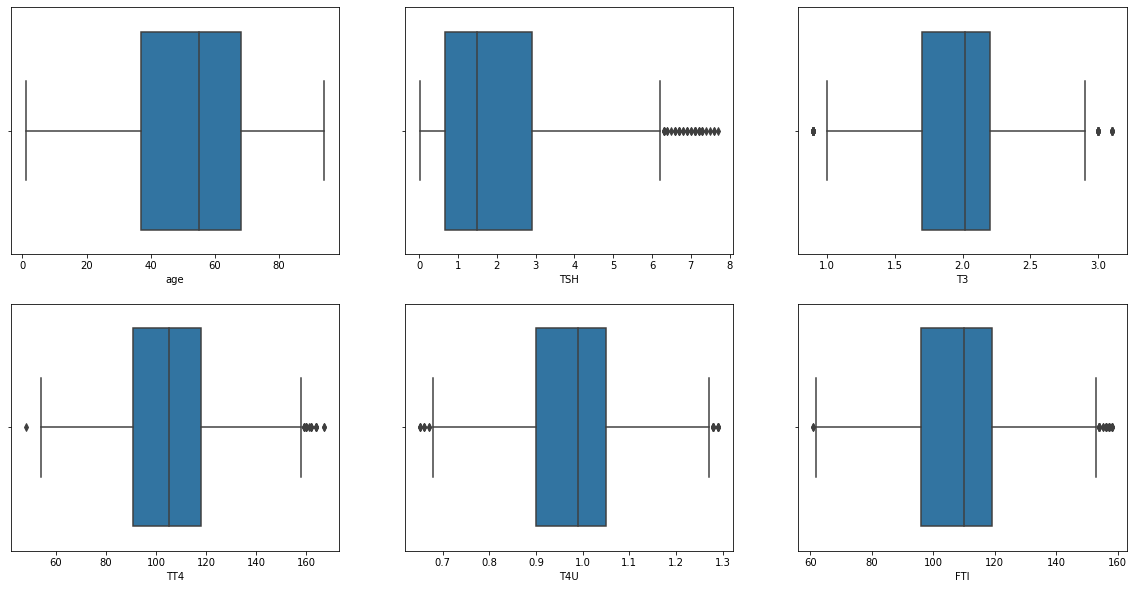

In [44]:
fig, ax = plt.subplots(2,3, figsize =(20,10))

sns.boxplot(data['age'], ax = ax[0][0])
sns.boxplot(data['TSH'], ax = ax[0][1])
sns.boxplot(data['T3'], ax = ax[0][2])
sns.boxplot(data['TT4'], ax = ax[1][0])
sns.boxplot(data['T4U'], ax = ax[1][1])
sns.boxplot(data['FTI'], ax = ax[1][2])

<AxesSubplot:xlabel='FTI', ylabel='Density'>

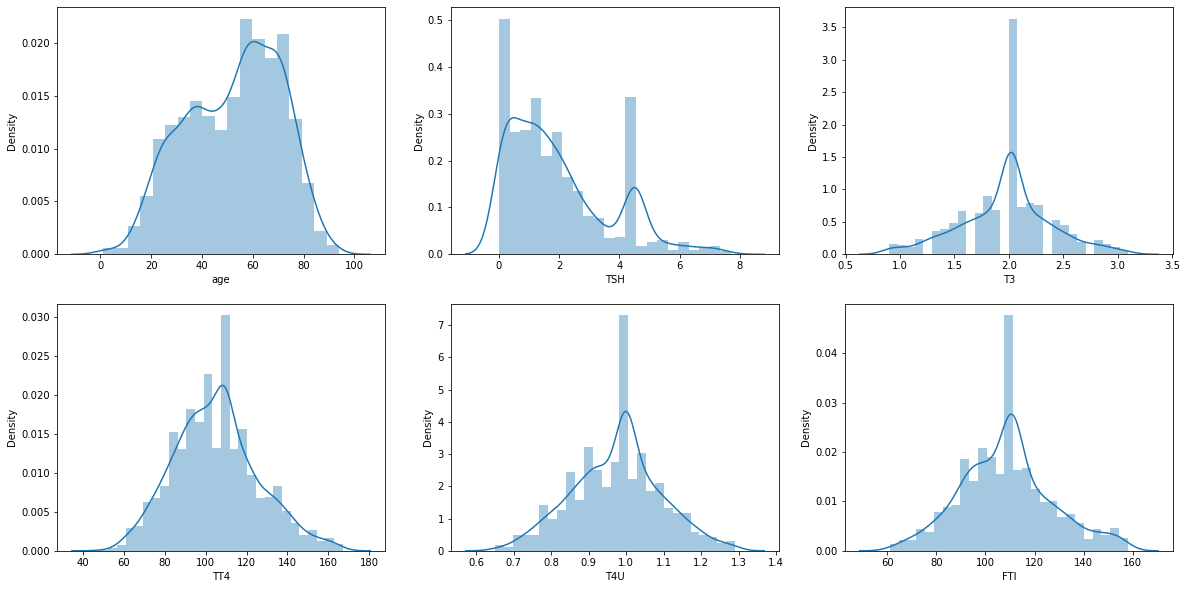

In [45]:
fig, ax = plt.subplots(2,3, figsize =(20,10))

sns.distplot(data['age'], ax = ax[0][0])
sns.distplot(data['TSH'], ax = ax[0][1])
sns.distplot(data['T3'], ax = ax[0][2])
sns.distplot(data['TT4'], ax = ax[1][0])
sns.distplot(data['T4U'], ax = ax[1][1])
sns.distplot(data['FTI'], ax = ax[1][2])

In [46]:
# Transformation

In [47]:
import scipy.stats as s
import pylab

def plot_data(data, feature):
  plt.figure(figsize = (8, 4))
  plt.subplot(1,2,1)
  data[feature].hist()
  plt.subplot(1,2,2)
  s.probplot(data[feature], dist = 'norm', plot = pylab)
  plt.show()

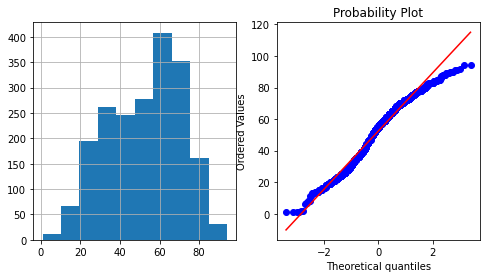

In [48]:
plot_data(data, 'age')

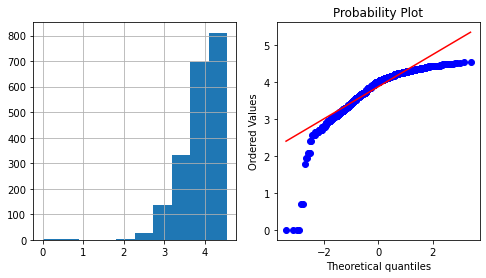

In [49]:
## Lograthemic transformation

data['Age_log'] = np.log(data['age'])
plot_data(data,'Age_log' )

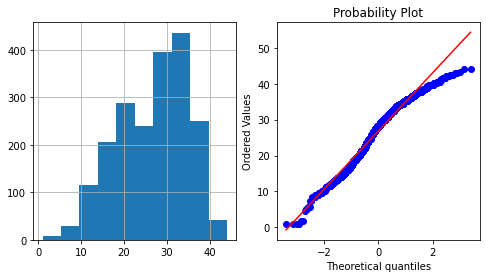

In [50]:
## Exponential Transformation

data['Age_exp'] = data.age**(1/1.2)
plot_data(data, 'Age_exp')

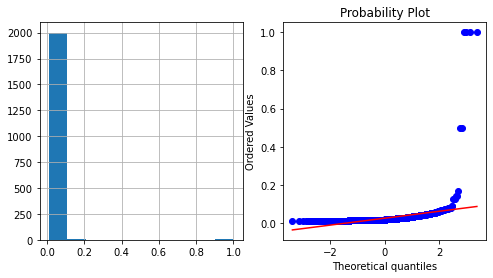

In [51]:
## Reciprocal Transformation
data['Age_rec'] = 1/ data.age
plot_data(data, 'Age_rec')

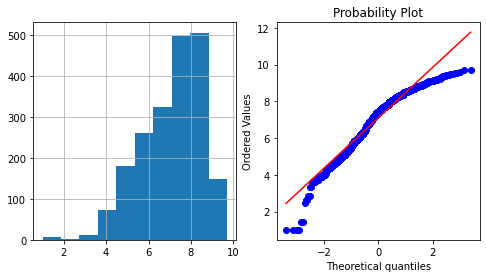

In [52]:
## Square Root Transformation
data['Age_square'] = data.age ** (1/2)
plot_data(data, 'Age_square')

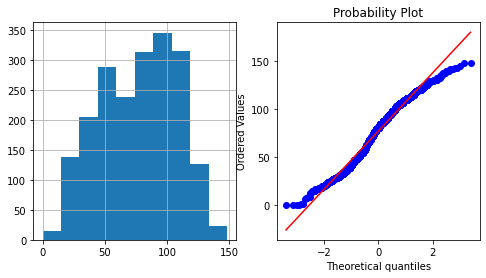

In [53]:
## Box cox transformation

import scipy
data['Age_boxcox'], parameter = s.boxcox(data['age'])
plot_data(data,'Age_boxcox')

In [54]:
# we observe that 'Lograthemic transformation', 'Reciprocal Transformation', 'Square Root Transformation' are not giving us the good results
data.drop(['Age_log','Age_rec','Age_square'], axis =1 , inplace = True)

<AxesSubplot:xlabel='Age_boxcox', ylabel='Density'>

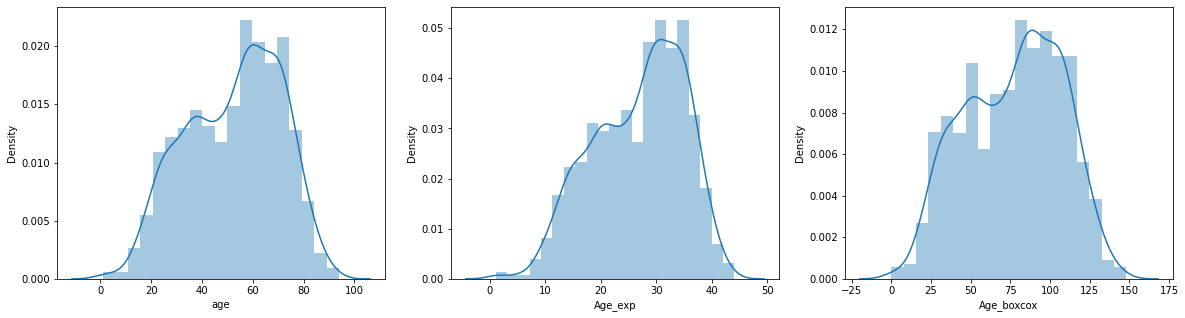

In [55]:
fig, ax = plt.subplots(1,3, figsize =(20,5))

sns.distplot(data['age'], ax = ax[0])
sns.distplot(data['Age_exp'], ax = ax[1])
sns.distplot(data['Age_boxcox'], ax = ax[2])

In [56]:
data.drop(['age','Age_boxcox'], axis =1 , inplace = True)

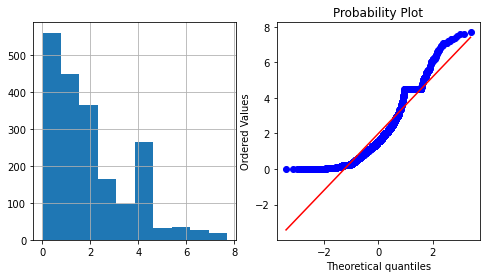

In [57]:
plot_data(data, 'TSH')

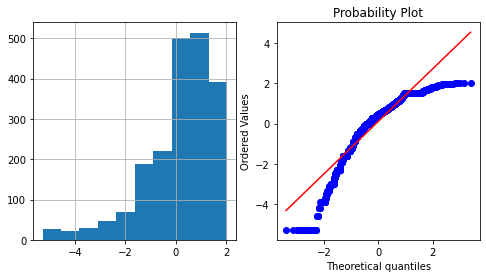

In [58]:
## Lograthemic transformation

data['TSH_log'] = np.log(data['TSH'])
plot_data(data,'TSH_log' )

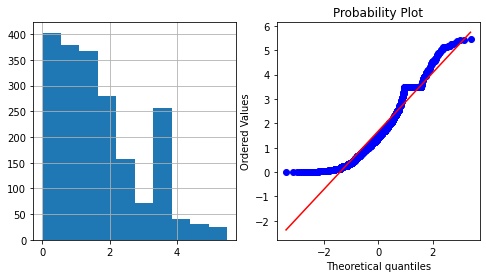

In [59]:
## Exponential Transformation

data['TSH_exp'] = data.TSH**(1/1.2)
plot_data(data, 'TSH_exp')

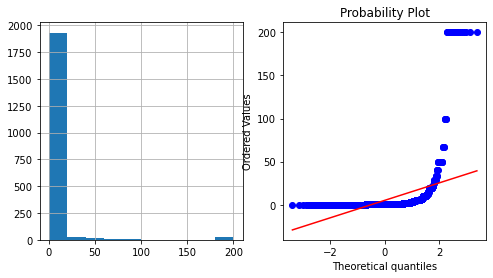

In [60]:
## Reciprocal Transformation
data['TSH_rec'] = 1/ data.TSH
plot_data(data, 'TSH_rec')

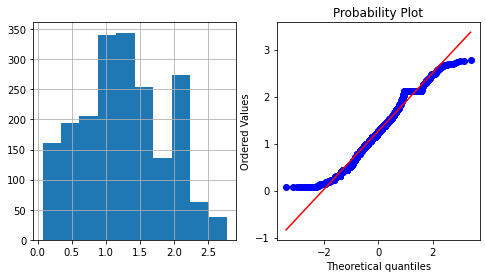

In [61]:
## Square Root Transformation
data['TSH_square'] = data.TSH ** (1/2)
plot_data(data, 'TSH_square')

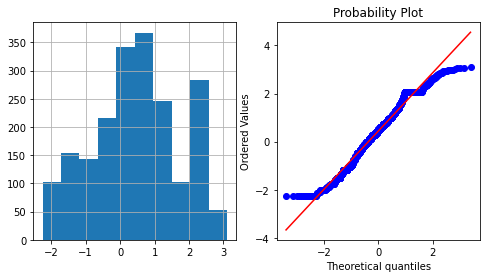

In [62]:
## Box cox transformation
data['TSH_boxcox'], parameter = s.boxcox(data['TSH'])
plot_data(data,'TSH_boxcox')

In [63]:
# we observe that 'Lograthemic transformation', 'Reciprocal Transformation', 'Exponential Transformation' are not giving us the good results
data.drop(['TSH_rec','TSH_log','TSH_exp'], axis =1 , inplace = True)

<AxesSubplot:xlabel='TSH_boxcox', ylabel='Density'>

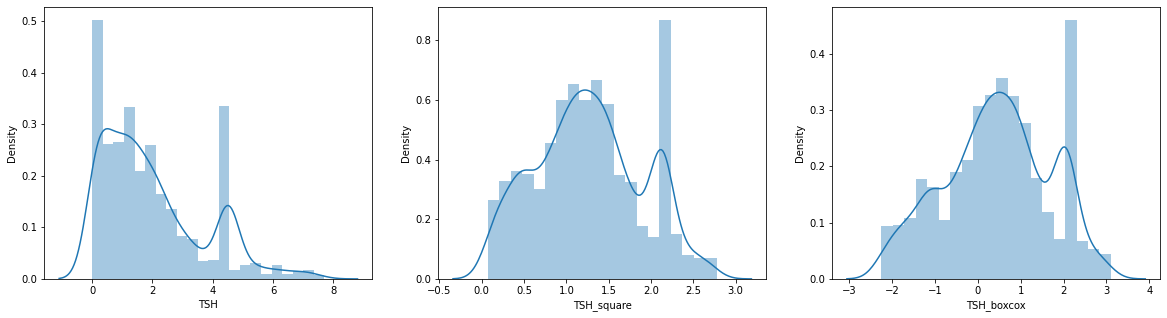

In [64]:
fig, ax = plt.subplots(1,3, figsize =(20,5))

sns.distplot(data['TSH'], ax = ax[0])
sns.distplot(data['TSH_square'], ax = ax[1])
sns.distplot(data['TSH_boxcox'], ax = ax[2])

In [65]:
data.drop(['TSH','TSH_square'], axis =1 , inplace = True)

In [66]:
data.head()

,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,T3,TT4,T4U,FTI,class,Age_exp,TSH_boxcox
0,F,f,f,f,f,0,0,f,f,f,f,f,2.500000,125.0,1.140000,109.000000,0,22.079363,0.276107
1,F,f,f,f,f,0,0,f,f,f,f,f,2.000000,102.0,0.998238,110.707007,0,13.638707,1.875517
2,M,f,f,f,f,0,0,f,f,f,f,f,2.021274,109.0,0.910000,120.000000,0,24.301413,-0.020124
4,F,f,f,f,f,0,0,f,f,f,f,f,1.200000,61.0,0.870000,70.000000,0,34.481147,-0.308533
6,F,f,f,f,f,0,0,f,f,f,f,f,2.021274,72.0,0.920000,78.000000,0,29.902673,2.044736


In [67]:
cat_col = data.select_dtypes(include = 'object').columns

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [69]:
for i in cat_col:
    data[i] = le.fit_transform(data[i])

In [70]:
data.head()

,gender,Thyroxine,queryThyroxine,antithyroid,sick,pregnant,I131treatment,hypothyroid,hyperthyroid,lithium,tumor,hypopituitary,T3,TT4,T4U,FTI,class,Age_exp,TSH_boxcox
0,0,0,0,0,0,0,0,0,0,0,0,0,2.500000,125.0,1.140000,109.000000,0,22.079363,0.276107
1,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,102.0,0.998238,110.707007,0,13.638707,1.875517
2,1,0,0,0,0,0,0,0,0,0,0,0,2.021274,109.0,0.910000,120.000000,0,24.301413,-0.020124
4,0,0,0,0,0,0,0,0,0,0,0,0,1.200000,61.0,0.870000,70.000000,0,34.481147,-0.308533
6,0,0,0,0,0,0,0,0,0,0,0,0,2.021274,72.0,0.920000,78.000000,0,29.902673,2.044736


In [71]:
data.drop('hypopituitary', axis = 1, inplace = True)

## Feature Selection 

<AxesSubplot:>

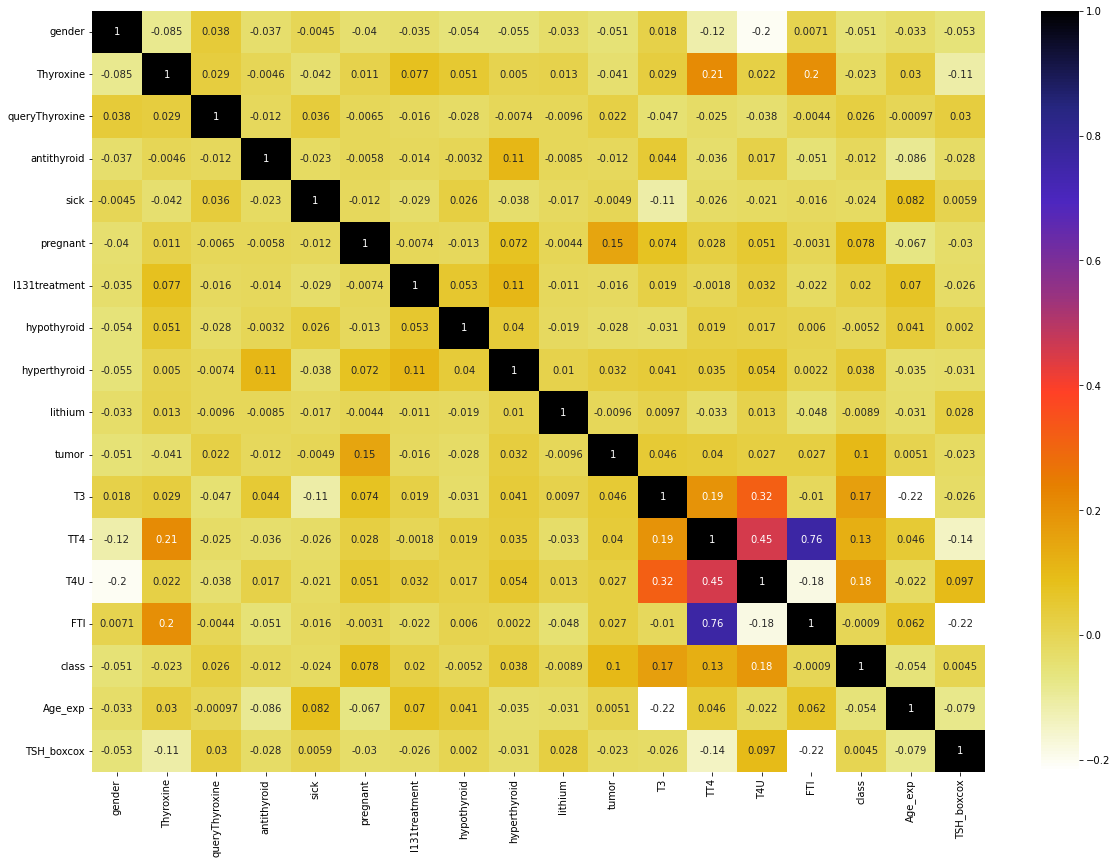

In [72]:
plt.figure(figsize =(20,14))
sns.heatmap(data.corr(), annot = True , cmap ='CMRmap_r')

- we observe that 'FTI' and 'TT4' are having high correlation among each other

In [73]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [74]:
corr_features = correlation(data, 0.6)
corr_features

{'FTI'}

In [75]:
# Dropping correlated feature 'FIT'
data.drop('FTI', axis = 1, inplace = True)

In [76]:
data.drop('TSH_boxcox', axis = 1, inplace = True)

In [77]:
## Chi square test

from sklearn.feature_selection import chi2

In [78]:
x1 = data[['gender','Thyroxine','queryThyroxine','antithyroid','sick','pregnant','I131treatment','hypothyroid','hyperthyroid','lithium','tumor']]
y1 = data['class']

In [79]:
f_score =chi2(x1,y1)

In [80]:
p_value = pd.Series(f_score[1],index = x1.columns)
p_value = p_value.sort_values(ascending = True)
p_value

tumor             0.000003
pregnant          0.000482
gender            0.063183
hyperthyroid      0.092361
queryThyroxine    0.246550
sick              0.299822
Thyroxine         0.338486
I131treatment     0.381355
antithyroid       0.606212
lithium           0.691914
hypothyroid       0.820061
dtype: float64

In [81]:
cols = []

for i in p_value.index:
    if p_value[i] <=0.05:
        print(i, '------------', 'Reject Null Hypothesis')
    else:
        print(i, '------------', 'Accept Null Hypothesis')
        cols.append(i)

tumor ------------ Reject Null Hypothesis
pregnant ------------ Reject Null Hypothesis
gender ------------ Accept Null Hypothesis
hyperthyroid ------------ Accept Null Hypothesis
queryThyroxine ------------ Accept Null Hypothesis
sick ------------ Accept Null Hypothesis
Thyroxine ------------ Accept Null Hypothesis
I131treatment ------------ Accept Null Hypothesis
antithyroid ------------ Accept Null Hypothesis
lithium ------------ Accept Null Hypothesis
hypothyroid ------------ Accept Null Hypothesis


In [82]:
# droping features that will not add any value to my model 

data.drop(labels = cols, axis = 1, inplace = True)

In [83]:
data.head()

,pregnant,tumor,T3,TT4,T4U,class,Age_exp
0,0,0,2.500000,125.0,1.140000,0,22.079363
1,0,0,2.000000,102.0,0.998238,0,13.638707
2,0,0,2.021274,109.0,0.910000,0,24.301413
4,0,0,1.200000,61.0,0.870000,0,34.481147
6,0,0,2.021274,72.0,0.920000,0,29.902673


## Splitting

In [84]:
X = data.drop(['class'], axis  =1)
y = data['class']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape

((1608, 6), (403, 6))

## Model Building

In [86]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# create the instance of logistic regression model
lr = LogisticRegression()

# fit the model
lr.fit(X_train, y_train)

LogisticRegression()

In [87]:
# Make a prediction for the testing set
y_pred_lr = lr.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [89]:
# print accuracy on  test data

print('Accuracy Score on testing data:', accuracy_score(y_test, y_pred_lr))

Accuracy Score on testing data: 0.9875930521091811


In [90]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       399
           1       0.00      0.00      0.00         4

    accuracy                           0.99       403
   macro avg       0.50      0.50      0.50       403
weighted avg       0.98      0.99      0.98       403



In [91]:
# f1 score 

print('f1_score :', f1_score(y_test, y_pred_lr) )

f1_score : 0.0


In [92]:
# precision score

print('Precision Score :', precision_score(y_test, y_pred_lr) )

Precision Score : 0.0


In [93]:
# Recall Score

print('Recall Score :', recall_score(y_test, y_pred_lr) )

Recall Score : 0.0


<AxesSubplot:>

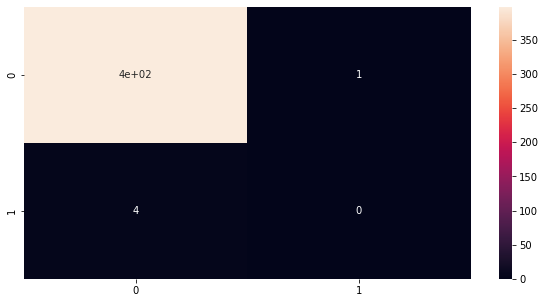

In [94]:
# Confusion matrics

plt.figure(figsize =(10,5))
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot = True)

In [95]:
#let's first visualize the decisiontree on the data without doing any pre processing
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
y_pred_dt = dt.predict(X_test)

In [97]:
# print accuracy on  test data

print('Accuracy Score on testing data:', accuracy_score(y_test, y_pred_dt))

Accuracy Score on testing data: 0.9925558312655087


In [98]:
# precision score

print('Precision Score :', precision_score(y_test, y_pred_dt) )

Precision Score : 0.6666666666666666


In [99]:
# Recall Score

print('Recall Score :', recall_score(y_test, y_pred_dt) )

Recall Score : 0.5


In [100]:
# f1 score 

print('f1_score :', f1_score(y_test, y_pred_dt) )

f1_score : 0.5714285714285715


## Balance the dataset using SMOTE

In [101]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state =23)
X_sm , y_sm = sm.fit_resample(X,y)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_sm , y_sm, test_size = 0.20, random_state = 42)

In [103]:
# create the instance of logistic regression model
clf1 = LogisticRegression()

# fit the model
clf1.fit(X_train, y_train)

LogisticRegression()

In [104]:
#let's first visualize the tree on the data without doing any pre processing
clf2 = DecisionTreeClassifier()
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
## Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()

# fit the model
clf3.fit(X_train, y_train)


GaussianNB()

In [106]:
# Support Vector Machine


from sklearn import svm
clf4 = svm.SVC(kernel = 'linear')

#fit the model
clf4.fit(X_train, y_train)

SVC(kernel='linear')

In [107]:
# prediction on testing data
y_pred_lr1 = clf1.predict(X_test)
y_pred_dt2 = clf2.predict(X_test)
y_pred_nb = clf3.predict(X_test)
y_pred_svm = clf4.predict(X_test)


In [108]:
# print accuracy on  test data

print('Accuracy Score on testing data LR:', accuracy_score(y_test, y_pred_lr1))
print('Accuracy Score on testing data DT:', accuracy_score(y_test, y_pred_dt2))
print('Accuracy Score on testing data NB:', accuracy_score(y_test, y_pred_nb))
print('Accuracy Score on testing data SVM:', accuracy_score(y_test, y_pred_svm))

Accuracy Score on testing data LR: 0.9408805031446541
Accuracy Score on testing data DT: 0.9811320754716981
Accuracy Score on testing data NB: 0.8591194968553459
Accuracy Score on testing data SVM: 0.9459119496855346


In [109]:
# f1 score 

print('f1_score : LR', f1_score(y_test, y_pred_lr1) )
print('f1_score : DT', f1_score(y_test, y_pred_dt2) )
print('f1_score : NB', f1_score(y_test, y_pred_nb) )
print('f1_score : SVM', f1_score(y_test, y_pred_svm) )

f1_score : LR 0.9405815423514539
f1_score : DT 0.9806451612903225
f1_score : NB 0.871264367816092
f1_score : SVM 0.9450830140485312


<AxesSubplot:>

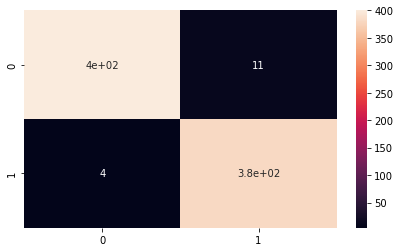

In [110]:
# Confusion matrics on DT

plt.figure(figsize =(7,4))
cm = confusion_matrix(y_test, y_pred_dt2)

sns.heatmap(cm, annot = True)

<AxesSubplot:>

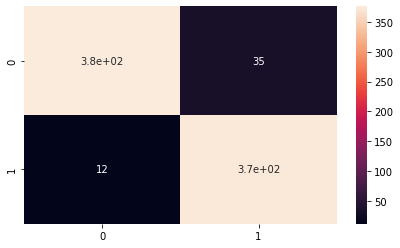

In [111]:
# Confusion matrics on Logistic Regression

plt.figure(figsize =(7,4))
cm = confusion_matrix(y_test, y_pred_lr1)

sns.heatmap(cm, annot = True)

<AxesSubplot:>

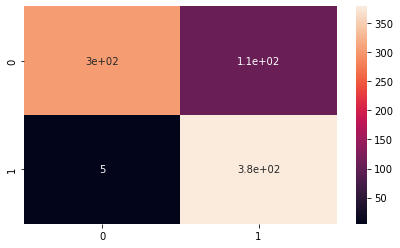

In [112]:
# Confusion matrics on Naive Bayes

plt.figure(figsize =(7,4))
cm = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm, annot = True)

<AxesSubplot:>

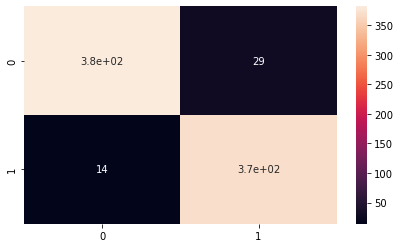

In [113]:
# Confusion matrics on SVM

plt.figure(figsize =(7,4))
cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot = True)

## Comparision

In [128]:
Models = pd.DataFrame({'Models':['LogisticRegression', 'DecisionTree','Naive Bayes','SVM'], 'Accuracy': [accuracy_score(y_test, y_pred_lr1)*100,accuracy_score(y_test, y_pred_dt2)*100,accuracy_score(y_test, y_pred_nb)*100,accuracy_score(y_test, y_pred_svm)*100]})

<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

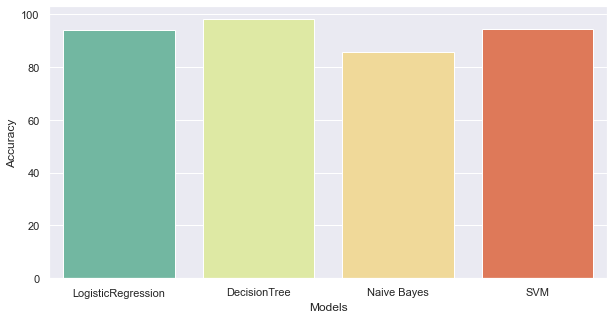

In [129]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(Models['Models'], Models['Accuracy'],palette="Spectral_r")

- Decision Tree is giving the highest accuracy score of 98% followed by SVM with 94%

In [126]:
F1_Score = pd.DataFrame({'Models':['LogisticRegression', 'DecisionTree','Naive Bayes','SVM'], 'f1_score': [f1_score(y_test, y_pred_lr1),f1_score(y_test, y_pred_dt2),f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_svm)]})

<AxesSubplot:xlabel='Models', ylabel='f1_score'>

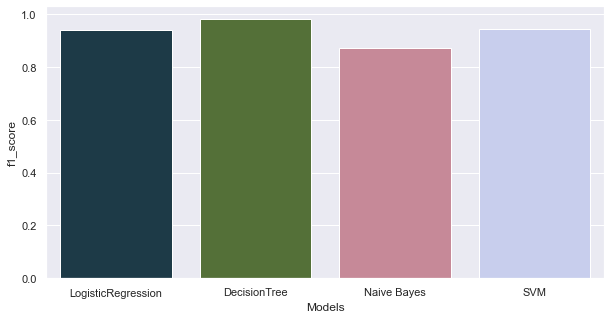

In [127]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(F1_Score['Models'], F1_Score['f1_score'],palette="cubehelix")

- Decision Tree is giving the highest f1_score  of 0.98 followed by SVM with 0.94